In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Depression Professional Dataset.csv")

In [3]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [4]:
df.describe()

,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


In [5]:
df.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['gender', 'age', 'work_pressure', 'job_satisfaction', 'sleep_duration',
       'dietary_habits', 'have_you_ever_had_suicidal_thoughts_?', 'work_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')

In [7]:
num_cols = df.dtypes[df.dtypes != 'object'].index.to_list()
num_cols

['age', 'work_pressure', 'job_satisfaction', 'work_hours', 'financial_stress']

In [8]:

df.isnull().sum()

gender                                   0
age                                      0
work_pressure                            0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
have_you_ever_had_suicidal_thoughts_?    0
work_hours                               0
financial_stress                         0
family_history_of_mental_illness         0
depression                               0
dtype: int64

In [9]:

df['depression'].value_counts()

depression
No     1851
Yes     203
Name: count, dtype: int64

In [10]:
df['depression'] = df['depression'].map({'Yes': 1, 'No': 0})

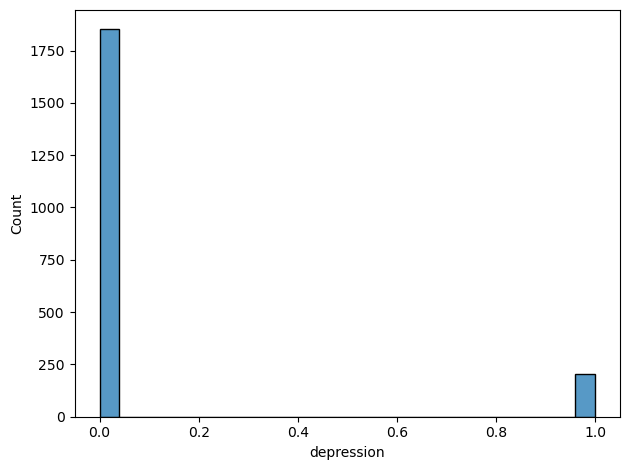

In [11]:
sns.histplot(df['depression'], bins=25)
plt.tight_layout()
plt.show()

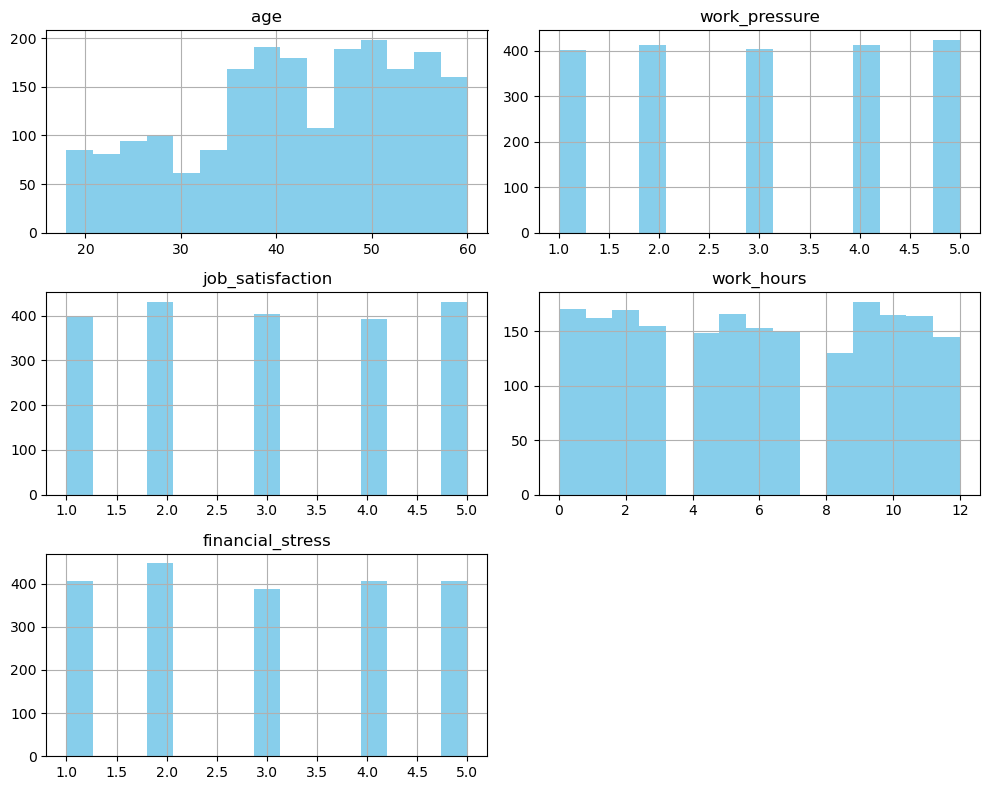

In [12]:
df[num_cols].hist(figsize=(10, 8), bins=15, color='skyblue')
plt.tight_layout()
plt.show()

In [13]:
df[num_cols].corr()

,age,work_pressure,job_satisfaction,work_hours,financial_stress
age,1.000000,-0.000472,-0.048758,-0.004399,0.019743
work_pressure,-0.000472,1.000000,-0.012764,-0.055904,0.019687
job_satisfaction,-0.048758,-0.012764,1.000000,0.007383,-0.006156
work_hours,-0.004399,-0.055904,0.007383,1.000000,-0.000186
financial_stress,0.019743,0.019687,-0.006156,-0.000186,1.000000


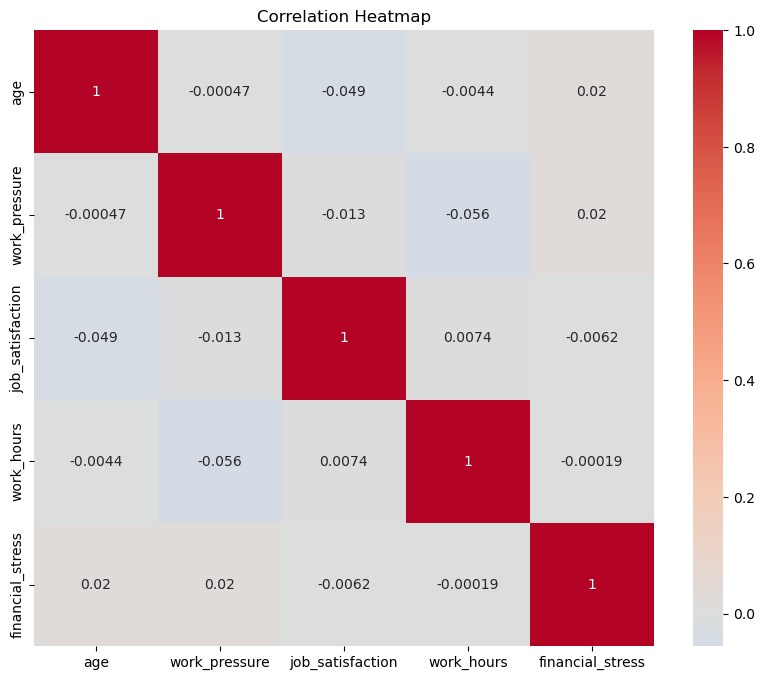

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
cat_cols = ['gender', 'dietary_habits', 'family_history_of_mental_illness', 'have_you_ever_had_suicidal_thoughts_?']

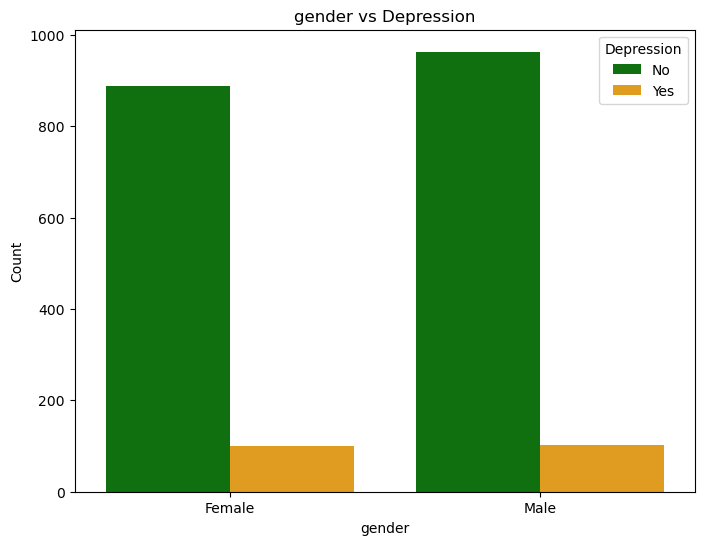

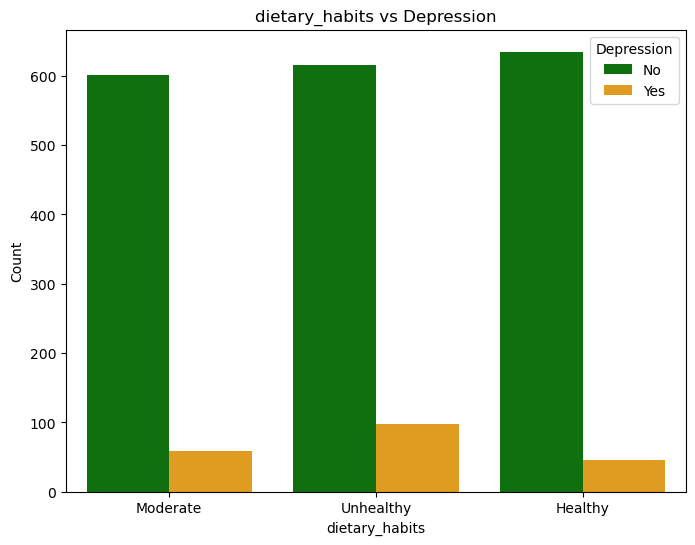

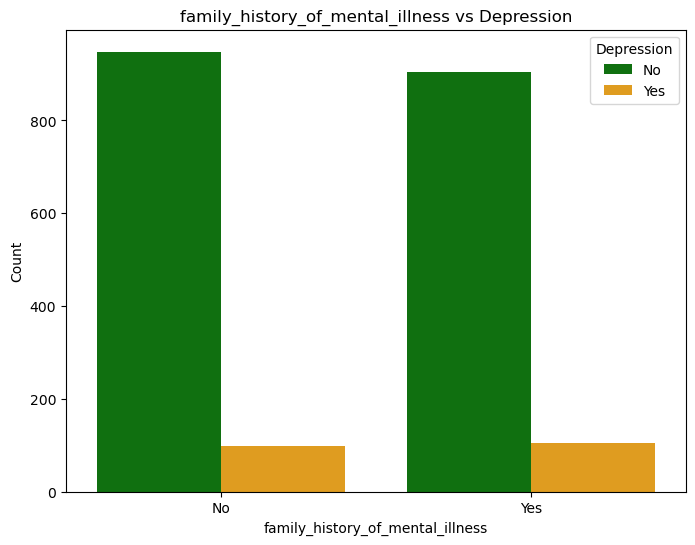

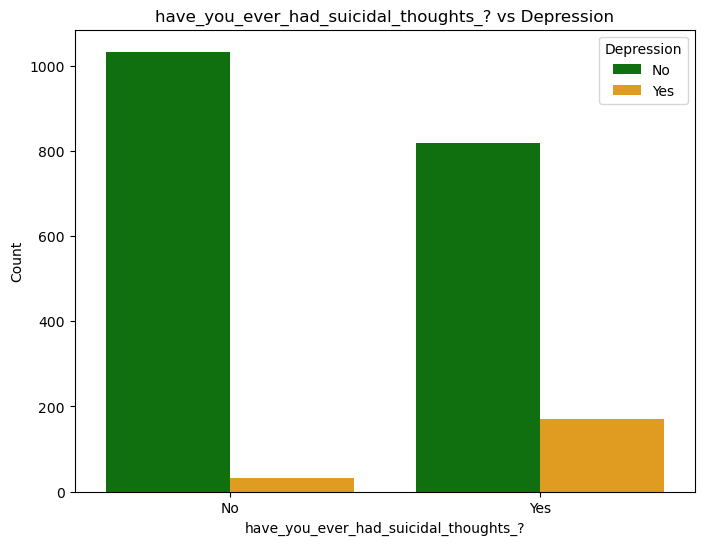

In [16]:
custom_palette = {0: 'green', 1: 'orange'}

for feature in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue='depression', palette=custom_palette)
    plt.title(f'{feature} vs Depression')
    plt.ylabel('Count')
    plt.legend(title='Depression', labels=['No', 'Yes'])
    plt.show()

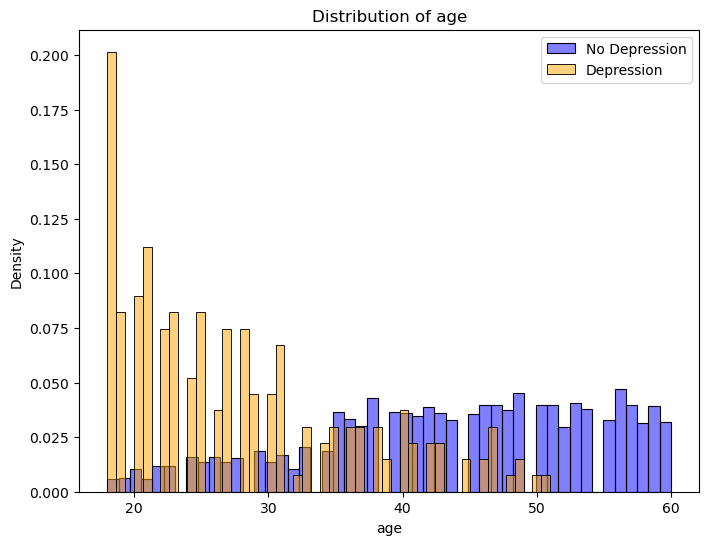

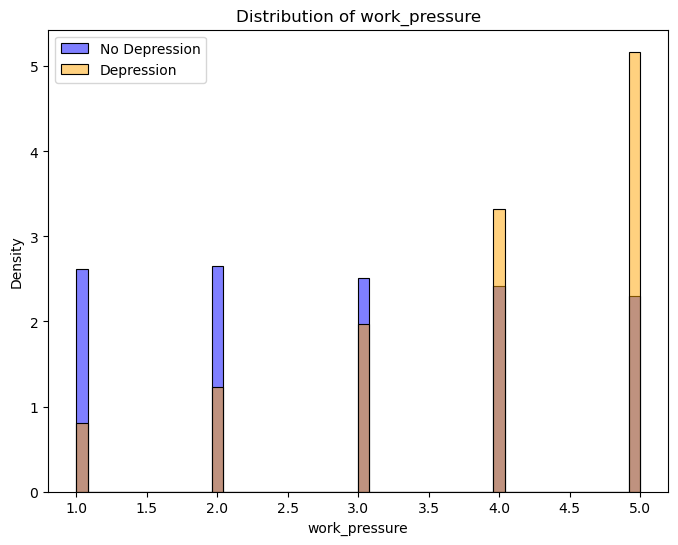

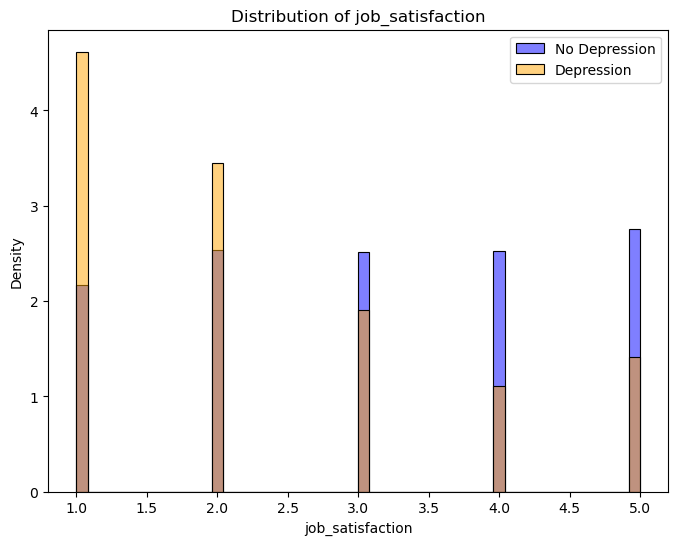

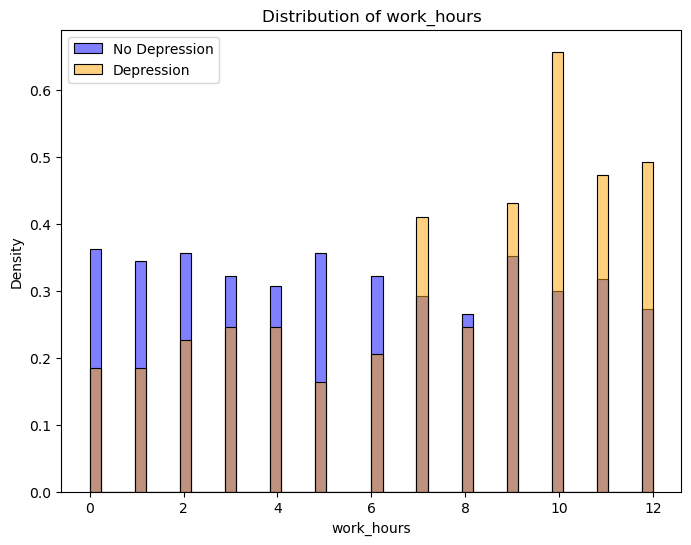

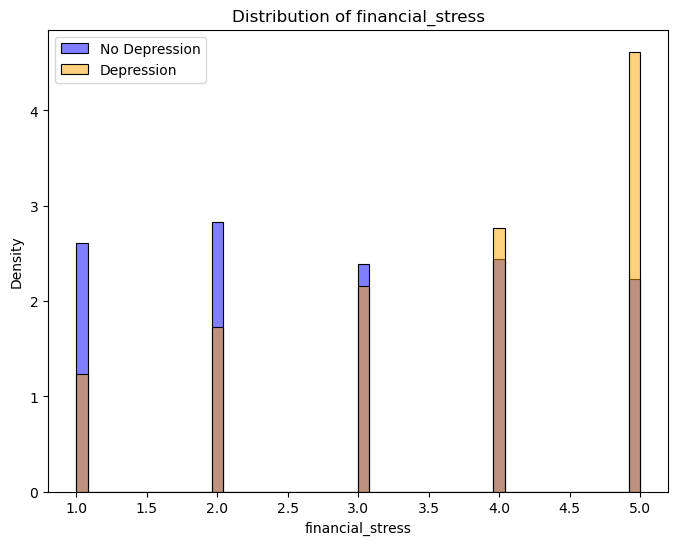

In [17]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col][df.depression == 0],
                 stat='density', bins=50,
                 color='blue', alpha=0.5,
                 label='No Depression')
    sns.histplot(df[col][df.depression == 1],
                 stat='density', bins=50,
                 color='orange', alpha=0.5,
                 label='Depression')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


In [18]:
df['depression'].nunique()

2

In [19]:
df['depression'].value_counts()

depression
0    1851
1     203
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(df[cat_cols])

ohe_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cat_cols))

df_encoded = pd.concat([df, ohe_df], axis=1).drop(cat_cols, axis=1)
df_encoded.head()

,age,work_pressure,job_satisfaction,sleep_duration,work_hours,financial_stress,depression,gender_Male,dietary_habits_Moderate,dietary_habits_Unhealthy,family_history_of_mental_illness_Yes,have_you_ever_had_suicidal_thoughts_?_Yes
0,37,2.0,4.0,7-8 hours,6,2,0,0.0,1.0,0.0,0.0,0.0
1,60,4.0,3.0,5-6 hours,0,4,0,1.0,0.0,1.0,1.0,1.0
2,42,2.0,3.0,5-6 hours,0,2,0,0.0,1.0,0.0,0.0,0.0
3,44,3.0,5.0,7-8 hours,1,2,0,0.0,0.0,0.0,1.0,1.0
4,48,4.0,3.0,7-8 hours,6,5,0,1.0,1.0,0.0,1.0,1.0


In [21]:
age_bins = [18, 30, 45, 60, float('inf')]
age_labels = ['18-30', '31-45', '46-60', '61+']
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=age_bins, labels=age_labels, right=False)  # Right-exclusive
df_encoded["age_group"].head()

0    31-45
1      61+
2    31-45
3    31-45
4    46-60
Name: age_group, dtype: category
Categories (4, object): ['18-30' < '31-45' < '46-60' < '61+']

In [22]:
df_encoded.age_group.isnull().sum()

0

In [23]:
df.sleep_duration.unique()

array(['7-8 hours', '5-6 hours', 'More than 8 hours', 'Less than 5 hours'],
      dtype=object)

In [24]:
sleep_mapping = {
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9,
    'Less than 5 hours': 4  
}

df_encoded['sleep_duration'] = df_encoded['sleep_duration'].map(sleep_mapping)
df_encoded[['sleep_duration']].head()


,sleep_duration
0,7.5
1,5.5
2,5.5
3,7.5
4,7.5


In [25]:
df_encoded.head()

,age,work_pressure,job_satisfaction,sleep_duration,work_hours,financial_stress,depression,gender_Male,dietary_habits_Moderate,dietary_habits_Unhealthy,family_history_of_mental_illness_Yes,have_you_ever_had_suicidal_thoughts_?_Yes,age_group
0,37,2.0,4.0,7.5,6,2,0,0.0,1.0,0.0,0.0,0.0,31-45
1,60,4.0,3.0,5.5,0,4,0,1.0,0.0,1.0,1.0,1.0,61+
2,42,2.0,3.0,5.5,0,2,0,0.0,1.0,0.0,0.0,0.0,31-45
3,44,3.0,5.0,7.5,1,2,0,0.0,0.0,0.0,1.0,1.0,31-45
4,48,4.0,3.0,7.5,6,5,0,1.0,1.0,0.0,1.0,1.0,46-60


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_full_train, df_test = train_test_split(df_encoded, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [28]:
len(df_train), len(df_test), len(df_val)

(1232, 411, 411)

In [29]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train.head()

,age,work_pressure,job_satisfaction,sleep_duration,work_hours,financial_stress,depression,gender_Male,dietary_habits_Moderate,dietary_habits_Unhealthy,family_history_of_mental_illness_Yes,have_you_ever_had_suicidal_thoughts_?_Yes,age_group
0,36,3.0,2.0,5.5,5,3,0,0.0,0.0,1.0,0.0,1.0,31-45
1,50,5.0,2.0,9.0,0,1,0,1.0,0.0,0.0,0.0,1.0,46-60
2,56,4.0,2.0,7.5,9,5,0,0.0,0.0,1.0,0.0,0.0,46-60
3,52,1.0,4.0,7.5,12,3,0,0.0,0.0,1.0,1.0,1.0,46-60
4,58,2.0,4.0,4.0,2,5,0,0.0,1.0,0.0,0.0,1.0,46-60


In [30]:
y_train = df_train['depression']
del df_train['depression']
y_test = df_test['depression']
del df_test['depression']
y_val = df_val['depression']
del df_val['depression']

In [31]:
df_train.isnull().sum()
df_val.isnull().sum()

age                                          0
work_pressure                                0
job_satisfaction                             0
sleep_duration                               0
work_hours                                   0
financial_stress                             0
gender_Male                                  0
dietary_habits_Moderate                      0
dietary_habits_Unhealthy                     0
family_history_of_mental_illness_Yes         0
have_you_ever_had_suicidal_thoughts_?_Yes    0
age_group                                    0
dtype: int64

In [32]:
# !pip install xgboost

In [33]:
import xgboost as xgb
from tqdm.auto import tqdm
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, root_mean_squared_error, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [34]:
dv = DictVectorizer(sparse=False)

In [35]:
train_dict = df_train.to_dict(orient= 'records')
X_train = dv.fit_transform(train_dict)
X_train[:5]

array([[36. ,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  3. ,  0. ,  1. ,
         2. ,  5.5,  5. ,  3. ],
       [50. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ,  1. ,  1. ,
         2. ,  9. ,  0. ,  5. ],
       [56. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  5. ,  0. ,  0. ,
         2. ,  7.5,  9. ,  4. ],
       [52. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  1. ,  3. ,  0. ,  1. ,
         4. ,  7.5, 12. ,  1. ],
       [58. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  5. ,  0. ,  1. ,
         4. ,  4. ,  2. ,  2. ]])

In [36]:
dv.get_feature_names_out()

array(['age', 'age_group=18-30', 'age_group=31-45', 'age_group=46-60',
       'age_group=61+', 'dietary_habits_Moderate',
       'dietary_habits_Unhealthy', 'family_history_of_mental_illness_Yes',
       'financial_stress', 'gender_Male',
       'have_you_ever_had_suicidal_thoughts_?_Yes', 'job_satisfaction',
       'sleep_duration', 'work_hours', 'work_pressure'], dtype=object)

In [37]:
val_dict = df_val.to_dict(orient= 'records')
X_val = dv.transform(val_dict)
test_dict = df_test.to_dict(orient= 'records')
X_test = dv.transform(test_dict)

In [38]:
logmodel = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [39]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [40]:
logpred = logmodel.predict_proba(X_val)
logpred = logpred[:, 1]

In [41]:
roc_auc_score(y_val, logpred)

0.9999310725117176

In [42]:
def train(df_train, y_train, C=1.0):
    
    dicts = df_train.to_dict(orient='records')
    
    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [43]:
def predict(df_encoded, dv, model):
    dicts = df_encoded.to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [44]:
def fold(df_full_train, splits=2):
    kfold = KFold(n_splits=splits, shuffle=True, random_state=42)

    for C in tqdm([0.000001, 0.001, 1, 10]):
        scores = []
        
        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]
        
            y_train = df_train.depression.values
            del df_train['depression']
            y_val = df_val.depression.values
            del df_val['depression']
        
            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)
        
            auc = roc_auc_score(y_val, y_pred)
            scores.append((auc))
        print(scores)
            
        print(f"C={C:>4}, {np.mean(scores):.3f} +- {np.std(scores):3f}")

In [45]:

fold(df_full_train, splits=5)

  0%|          | 0/4 [00:00<?, ?it/s]

[0.8469496021220159, 0.9029910269192424, 0.9068965517241379, 0.847459165154265, 0.8072706935123042]
C=1e-06, 0.862 +- 0.037759
[0.8850574712643677, 0.947357926221336, 0.9571264367816092, 0.897005444646098, 0.9053691275167786]
C=0.001, 0.918 +- 0.028557
[0.9981432360742706, 0.9997008973080759, 0.999080459770115, 0.9970961887477313, 1.0]
C=   1, 0.999 +- 0.001064
[0.9995579133510167, 1.0, 0.9996551724137931, 0.9996370235934664, 1.0]
C=  10, 1.000 +- 0.000191


In [46]:
logmodel = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=42)

In [47]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42, solver='liblinear')

In [48]:
logpred = logmodel.predict_proba(X_val)[:,1]
roc_auc_score(y_val, logpred)

0.9994485800937414

In [49]:
dt = DecisionTreeClassifier(max_depth=5)

In [50]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [51]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- age <= 31.50
|   |--- have_you_ever_had_suicidal_thoughts_?_Yes <= 0.50
|   |   |--- financial_stress <= 3.50
|   |   |   |--- job_satisfaction <= 1.50
|   |   |   |   |--- age <= 20.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  20.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- job_satisfaction >  1.50
|   |   |   |   |--- class: 0
|   |   |--- financial_stress >  3.50
|   |   |   |--- sleep_duration <= 6.50
|   |   |   |   |--- job_satisfaction <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job_satisfaction >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- sleep_duration >  6.50
|   |   |   |   |--- age <= 21.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  21.50
|   |   |   |   |   |--- class: 0
|   |--- have_you_ever_had_suicidal_thoughts_?_Yes >  0.50
|   |   |--- work_pressure <= 2.50
|   |   |   |--- job_satisfaction <= 3.50
|   |   |   |   |--- age <= 21.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |

In [52]:
scores = []
for m in range(1,6,1):
    dt = DecisionTreeClassifier(max_depth=m)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict_proba(X_val)[:,1]
    auc = round(roc_auc_score(y_val, dt_pred), 3)
    scores.append((m, auc))
scores

[(1, 0.81), (2, 0.838), (3, 0.856), (4, 0.874), (5, 0.898)]

In [53]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dt_pred = dt.predict_proba(X_val)[:,1]
auc = round(roc_auc_score(y_val, dt_pred), 3)
auc

0.856

In [54]:
rf = RandomForestClassifier(n_estimators=10,
                           random_state=1,
                           n_jobs=-1)

In [55]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [56]:
rf_pred = rf.predict_proba(X_val)[:,1]

In [57]:
roc_auc_score(y_val, rf_pred)

0.9677763992280122

In [58]:
scores = []
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,
                           random_state=1,
                           n_jobs=-1)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict_proba(X_val)[:,1]
    auc = round(roc_auc_score(y_val, rf_pred), 3)
    scores.append((n, auc))

scores

[(10, 0.968),
 (20, 0.975),
 (30, 0.977),
 (40, 0.977),
 (50, 0.979),
 (60, 0.978),
 (70, 0.982),
 (80, 0.979),
 (90, 0.981),
 (100, 0.981),
 (110, 0.981),
 (120, 0.981),
 (130, 0.98),
 (140, 0.98),
 (150, 0.98),
 (160, 0.98),
 (170, 0.98),
 (180, 0.981),
 (190, 0.981),
 (200, 0.981)]

In [59]:
scores = []
max_depths= [5, 10, 15, 20, 25]
for m in max_depths:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,
                                   max_depth=m,
                                   random_state=1,
                                n_jobs=-1)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict_proba(X_val)[:,1]
        auc = round(roc_auc_score(y_val, rf_pred), 3)
        scores.append((n, m, auc))

In [60]:
scores_dt = pd.DataFrame(scores, columns=['n_est', 'max_depth', 'auc'])

In [61]:
scores_dt.sort_values('auc', ascending=False)

,n_est,max_depth,auc
0,10,5,0.984
30,110,10,0.983
66,70,20,0.982
32,130,10,0.982
31,120,10,0.982
...,...,...,...
19,200,5,0.975
20,10,10,0.973
80,10,25,0.968
60,10,20,0.968


In [62]:
rf_model = RandomForestClassifier(n_estimators=10,
                                 max_depth=5,
                                 random_state=1,
                                 n_jobs=-1)

In [63]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1, random_state=1)

In [64]:
importances = rf_model.feature_importances_

In [65]:
feature_importance_d = pd.DataFrame({
    'Feature': dv.get_feature_names_out(),
    'Importance': importances
})

In [66]:
feature_importance_d

,Feature,Importance
0,age,0.357041
1,age_group=18-30,0.081046
2,age_group=31-45,0.004994
3,age_group=46-60,0.037241
4,age_group=61+,0.001205
5,dietary_habits_Moderate,0.005419
6,dietary_habits_Unhealthy,0.016082
7,family_history_of_mental_illness_Yes,0.002901
8,financial_stress,0.064107
9,gender_Male,0.004494


In [67]:
rfmodel_pred = rf_model.predict_proba(X_val)[:,1]
round(roc_auc_score(y_val, rfmodel_pred), 3)

0.984

In [68]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [69]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [70]:
xgb_params = {
    'eta': 0.1,                    
    'max_depth': 5,                 
    'min_child_weight': 1,          
    
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',       
    'nthread': 8,                  
    
    'seed': 1,         
    'verbosity': 1,           
}

In [71]:
xgbmodel = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

[0]	train-logloss:0.31886	val-logloss:0.30986
[5]	train-logloss:0.21454	val-logloss:0.23690
[10]	train-logloss:0.15820	val-logloss:0.19585
[15]	train-logloss:0.12244	val-logloss:0.16918
[20]	train-logloss:0.09796	val-logloss:0.14950
[25]	train-logloss:0.08071	val-logloss:0.13965
[30]	train-logloss:0.06784	val-logloss:0.12959
[35]	train-logloss:0.05768	val-logloss:0.12250
[40]	train-logloss:0.04958	val-logloss:0.11535
[45]	train-logloss:0.04329	val-logloss:0.11132
[50]	train-logloss:0.03843	val-logloss:0.10933
[55]	train-logloss:0.03431	val-logloss:0.10676
[60]	train-logloss:0.03102	val-logloss:0.10486
[65]	train-logloss:0.02828	val-logloss:0.10271
[70]	train-logloss:0.02590	val-logloss:0.10168
[75]	train-logloss:0.02404	val-logloss:0.09928
[80]	train-logloss:0.02249	val-logloss:0.09914
[85]	train-logloss:0.02106	val-logloss:0.09744
[90]	train-logloss:0.01980	val-logloss:0.09639
[95]	train-logloss:0.01872	val-logloss:0.09521
[99]	train-logloss:0.01799	val-logloss:0.09454


In [72]:
xpred = xgbmodel.predict(dval)

In [73]:
roc_auc_score(y_val, xpred)

0.9895230217810862

In [74]:
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [75]:
xpredt = xgbmodel.predict(dtest)

In [76]:
roc_auc_score(y_test, xpredt)

0.9909411576078242

In [77]:
import pickle

filename = 'xgbmodel.bin'

pickle.dump(xgbmodel, open(filename, 'wb'))

In [78]:
pickle.dump(rf_model, open('rfcmodel.bin', 'wb'))

In [79]:
pickle.dump(dv, open('dv.bin', 'wb'))